# Customer Segmentation of Credit Cards

## Using Unsupervised Methods

### In this project, the marketing team of a fictional bank has 6 months of transactional data of customers using credit cards. They want to launch a targeted marketing ad campaign tailored to a specific group of customers. In order for the ad campaign to be successful, the customers have to be divided into 4 distinct groups.
- New Customers : New customers with low tenure who can be targted to enroll in new services (example: travel credit cards)
- Transactors : Customers who pay the least amount of interest, and who are careful with their spending
- Revolvers : Customers who use their credit cards as a loan, the most lucrative sector for the bank as they pay 20+% of interest
- VIP/Prime : Customers with high credit limit and % of full payment, targeted to increase their spending/limit

### This was a clustering problem, so I used the k-means algorithm. I also used the Elbow method to find the optimal number of clusters. And finally, ran PCA to reduce the 17 dimensions into 2, so the clusters could be eaily visualized in a 2D graph/image.

#### Data source: https://www.kaggle.com/arjunbhasin2013/ccdata

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

### Importing data

In [22]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Exploring the data

In [23]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

#### Describing the columns / features
CUSTID: Identification of Credit Card holder 

BALANCE: Balance amount left in customer's account to make purchases

BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES: Amount of purchase done in installment

CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user  

PRC_FULL_PAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

In [24]:
creditcard_df.shape

(8950, 18)

In [25]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [26]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [27]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [28]:
# Calulating the proportion of NA rows
(313 + 1)/8950*100

3.5083798882681565

In [29]:
# Since it is not significantly high, we can impute the NA values with the median for the MINIMUM_PAYMENTS column.
creditcard_df['MINIMUM_PAYMENTS'].fillna(np.nanmedian(creditcard_df['MINIMUM_PAYMENTS']), inplace=True)

In [30]:
# Same for the CREDIT_LIMIT row.
creditcard_df['CREDIT_LIMIT'].fillna(np.nanmedian(creditcard_df['CREDIT_LIMIT']), inplace=True)

In [31]:
# Double-checking to make sure there are no more NA rows.
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [33]:
# Dropping the CUST_ID column, as it is non-numeric and an identifier. This would not help us in the model.
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [34]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [37]:
# Checking the number of columns
print(len(creditcard_df.columns))

17


### Visualizing the dataset

In [38]:
creditcard_df['TENURE'] = creditcard_df['TENURE'].astype(float)

In [41]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Using KDE, we can estimate the Probability Density of all 17 features.

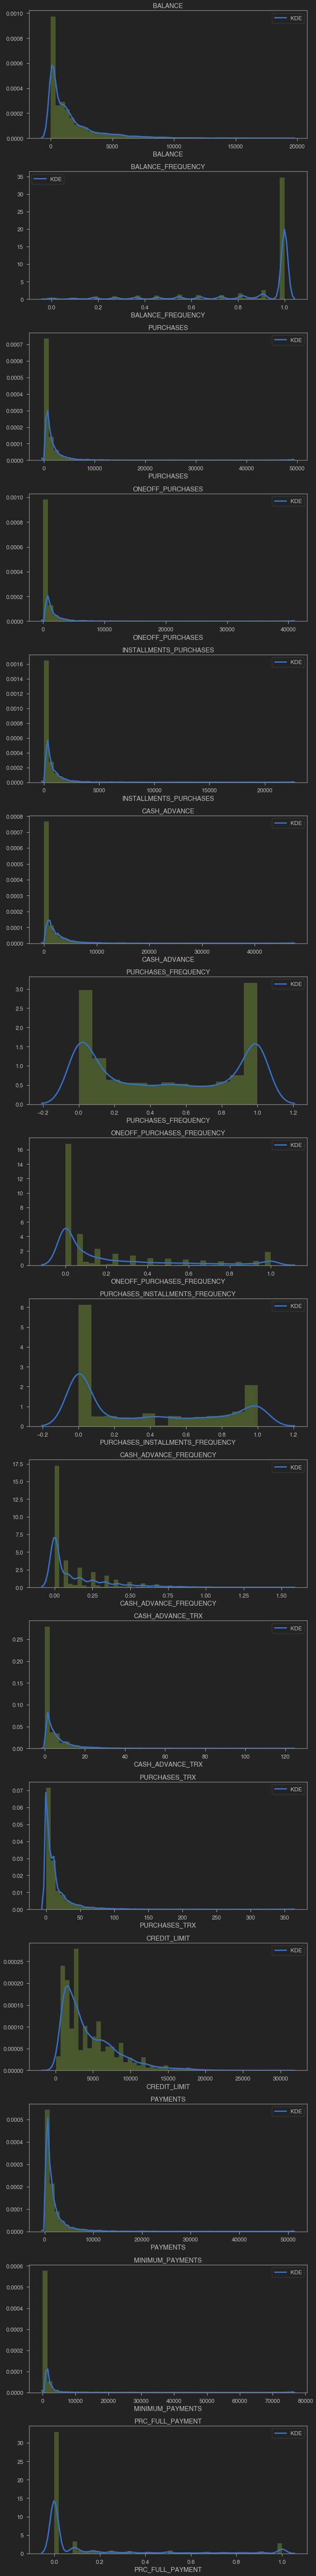

In [43]:
plt.figure(figsize=(10,80))
for i in range(16):
    plt.subplot(16, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], 
                 kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])
    plt.tight_layout()

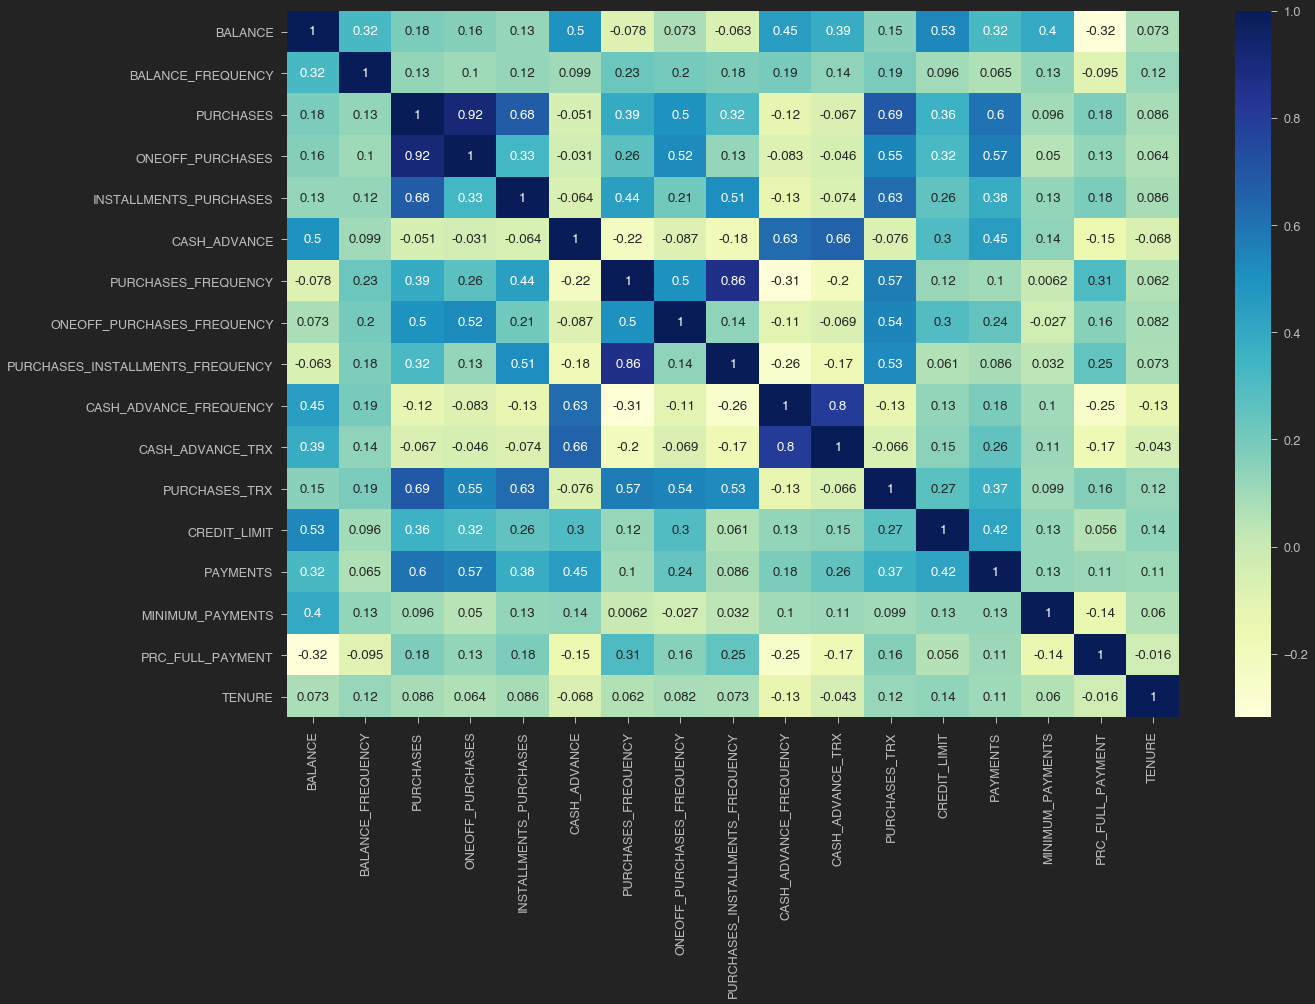

In [46]:
# Correlation Matrix
plt.subplots(figsize = (20,13))
dataplot = sns.heatmap(creditcard_df.corr(), cmap="YlGnBu", annot=True)

### Elbow Method : To find the optimal number of clusters

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

This is done by calculating the sum of squared distances between every point and the center of the cluster, then adding all the distances of every cluster in the iteration to obtain the Within Cluster Sum of Squares (WCSS). By plotting the WCSS against k (number of clusters), we can find out the optimal number of clusters.

In [48]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [49]:
creditcard_df_scaled.shape

(8950, 17)

In [50]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

Creating an array to plot WCSS vs k.

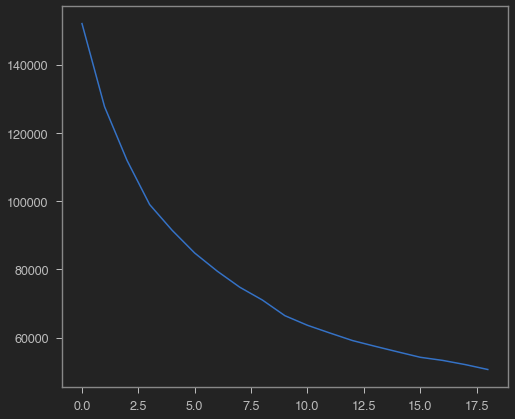

In [52]:
scores_1 = []

for i in range(1,20):
    km = KMeans(n_clusters = i)
    km.fit(creditcard_df_scaled)
    scores_1.append(km.inertia_)

plt.plot(scores_1, 'bx-')

The optimal number of cluster seems to be about 8. Now, applying that to the alogrithm.

### Applying K-Means Method

In [53]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [54]:
kmeans.cluster_centers_.shape

(8, 17)

In [55]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700774,-2.142458,-0.309826,-0.234356,-0.301910,-0.320004,-0.554195,-0.441318,-0.439313,-0.520884,-0.376232,-0.418560,-0.173791,-0.191605,-0.284281,0.285792,0.200241
1,-0.122154,0.403007,0.565256,0.684869,0.078111,-0.333081,0.998630,1.914306,0.215525,-0.421477,-0.335956,0.659549,0.466402,0.163489,-0.151141,0.460986,0.274459
2,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.563497,-0.391355,-0.215925,0.013610,-3.198580
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174213,8.991136,1.072085,1.236317,0.295702
4,-0.358201,0.332047,-0.029709,-0.240570,0.371526,-0.361567,0.996298,-0.380695,1.207351,-0.471485,-0.359088,0.194868,-0.259635,-0.212705,-0.023344,0.313977,0.255518
5,1.660220,0.396119,-0.222144,-0.157787,-0.235441,1.981783,-0.483146,-0.211910,-0.424003,1.911505,1.908096,-0.271298,1.004564,0.789643,0.547101,-0.395893,0.075019
6,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337682,1.532138,0.607723,0.259664,0.335772
7,0.005455,0.403039,-0.354120,-0.238699,-0.398670,-0.104269,-0.840919,-0.382634,-0.751078,0.087230,-0.039646,-0.477542,-0.307941,-0.253184,-0.009373,-0.455116,0.273533


In order to understand what these numbers mean, let's perform inverse transformation

In [56]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.872392,0.369742,341.256762,203.453753,138.053897,307.806878,0.267925,0.070804,0.189843,0.030910,0.681319,4.306002,3861.952193,1178.466249,181.774580,0.237304,11.785292
1,1310.221354,0.972739,2210.882782,1729.179928,481.702853,280.384123,0.891149,0.773532,0.450092,0.050802,0.956172,31.103757,6191.258741,2206.428847,492.345375,0.288545,11.884615
2,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2444.032000,600.208404,341.226740,0.157695,7.236800
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,818.910696,0.955929,939.731774,193.140808,747.033622,220.649252,0.890213,0.088889,0.844270,0.040795,0.798315,19.553518,3549.613579,1117.384628,790.453377,0.245548,11.859267
5,5020.082361,0.971108,528.591155,330.543621,198.161513,5134.761784,0.296441,0.139241,0.195928,0.517656,16.270179,7.966368,8149.332450,4019.081773,2121.107875,0.037923,11.617713
6,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2262.519402,0.229662,11.966667
7,1575.828506,0.972747,246.622905,196.246490,50.555654,760.214461,0.152849,0.088311,0.065940,0.152600,2.978269,2.839913,3373.856091,1000.202119,823.042857,0.020601,11.883376


First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%

Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (approx. $5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits

Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [57]:
labels.shape # Labels associated to each data point

(8950,)

In [58]:
labels.max()

7

In [59]:
labels.min()

0

Predicting the clusters

In [60]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([4, 5, 1, ..., 7, 7, 7], dtype=int32)

Concatenate the clusters labels to our original dataframe

In [61]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.0,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12.0,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.0,7


### Plot the histogram of various clusters

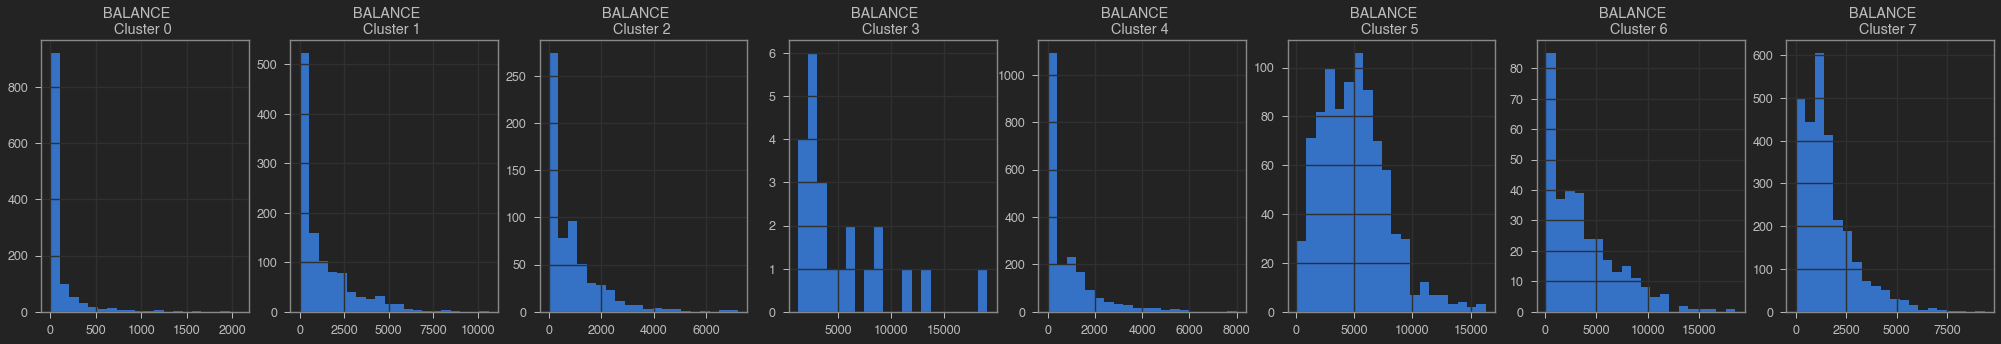

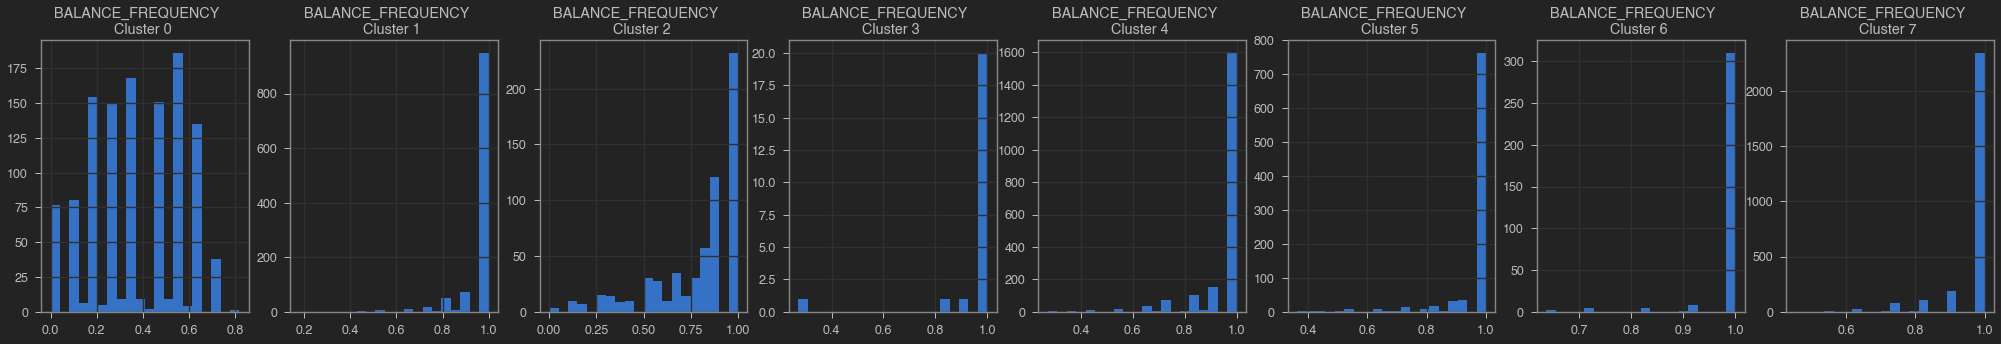

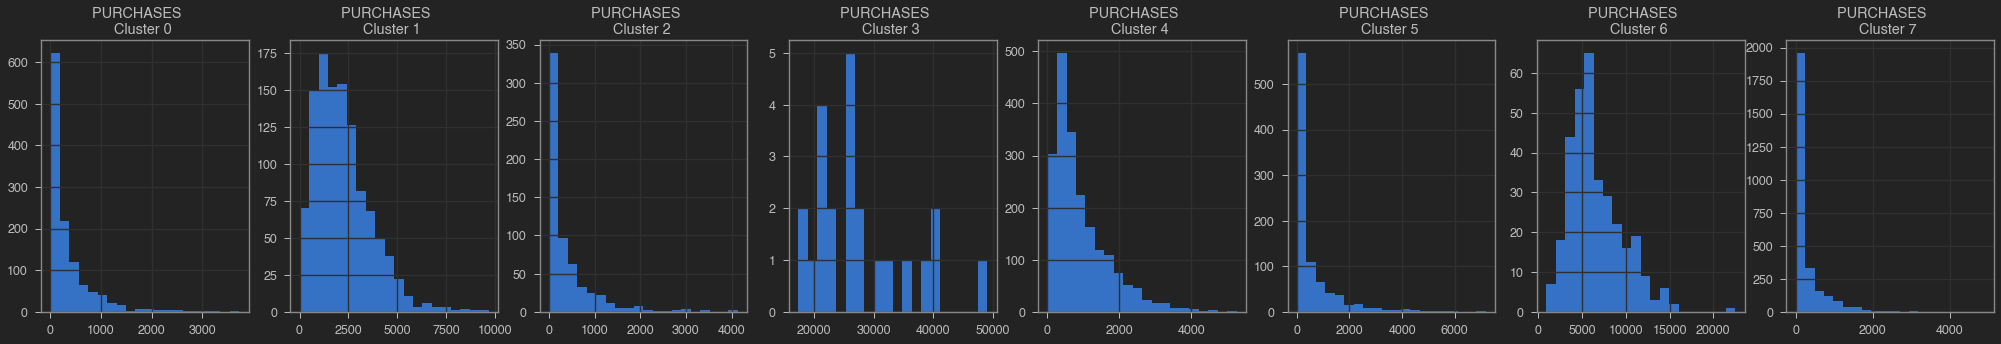

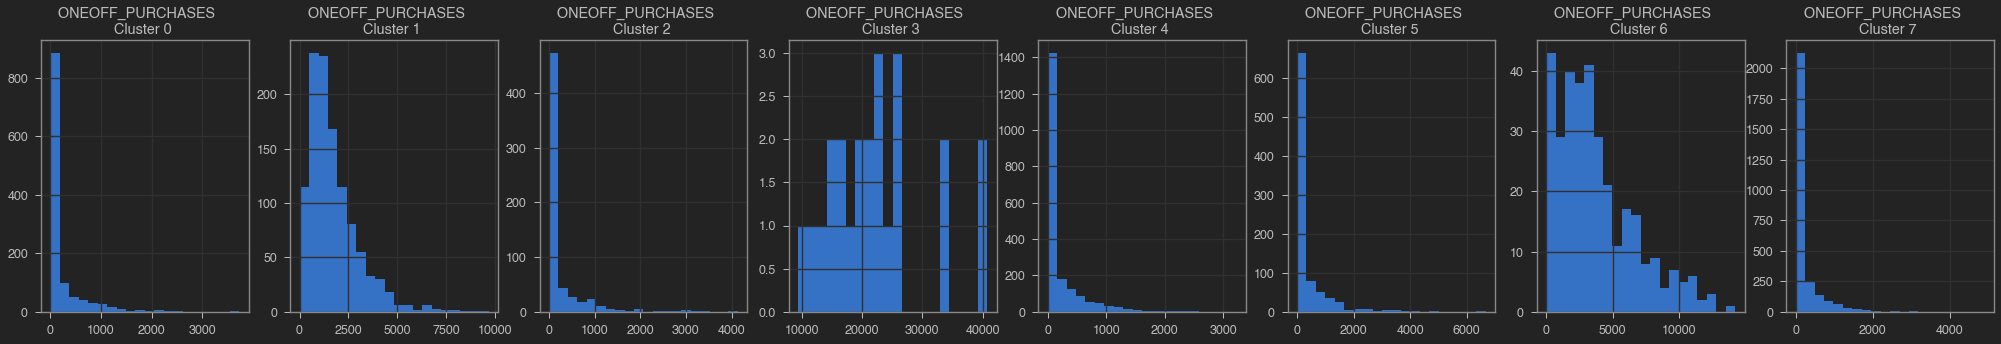

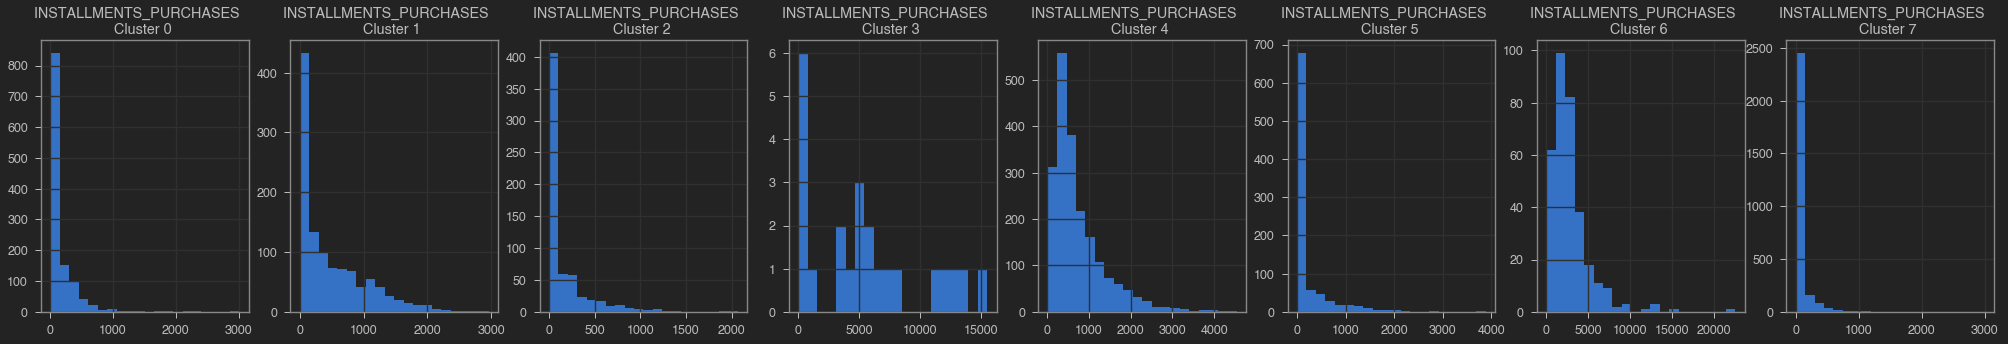

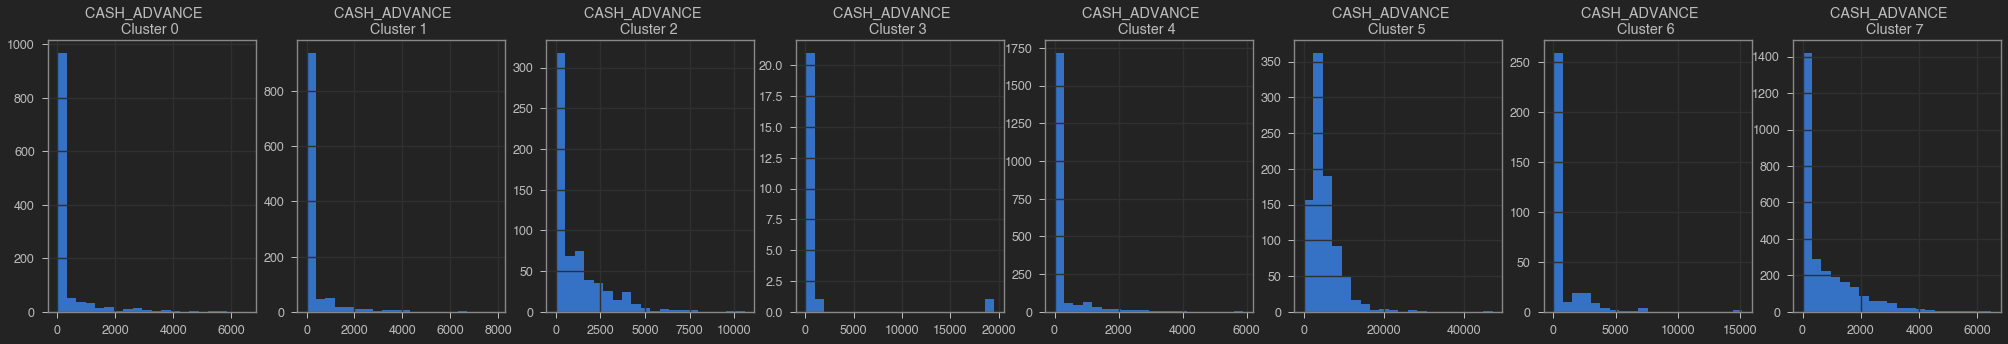

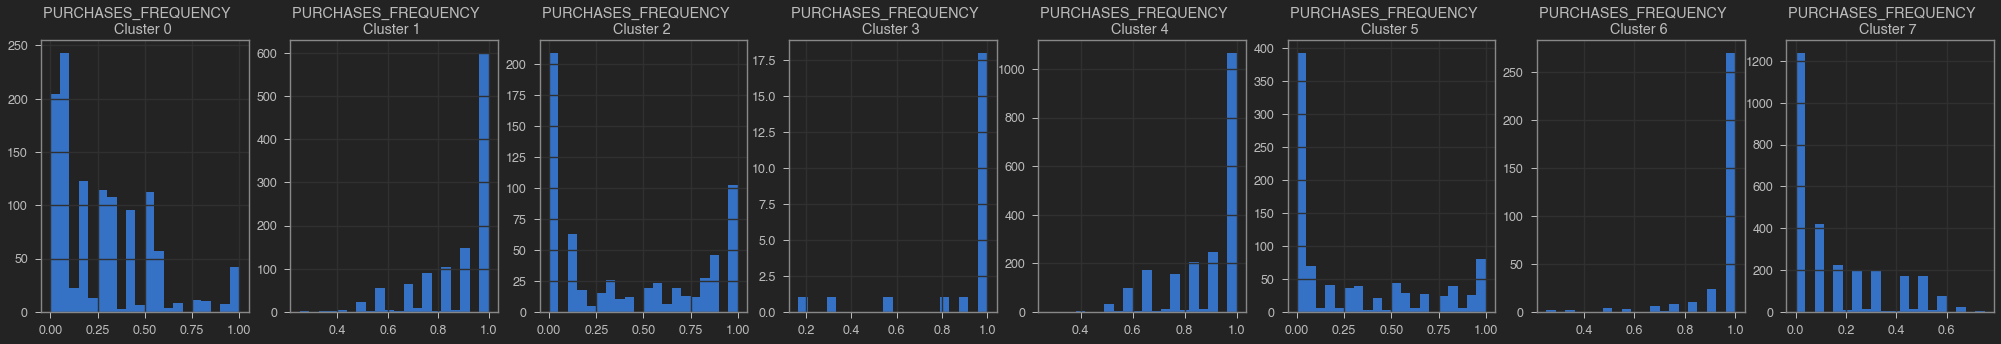

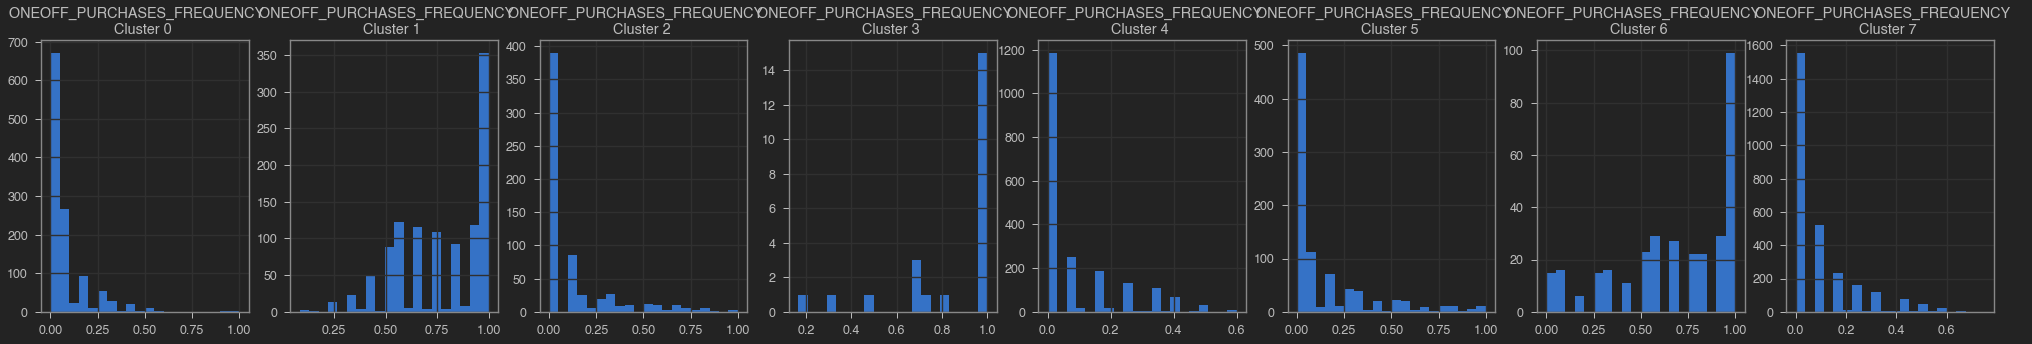

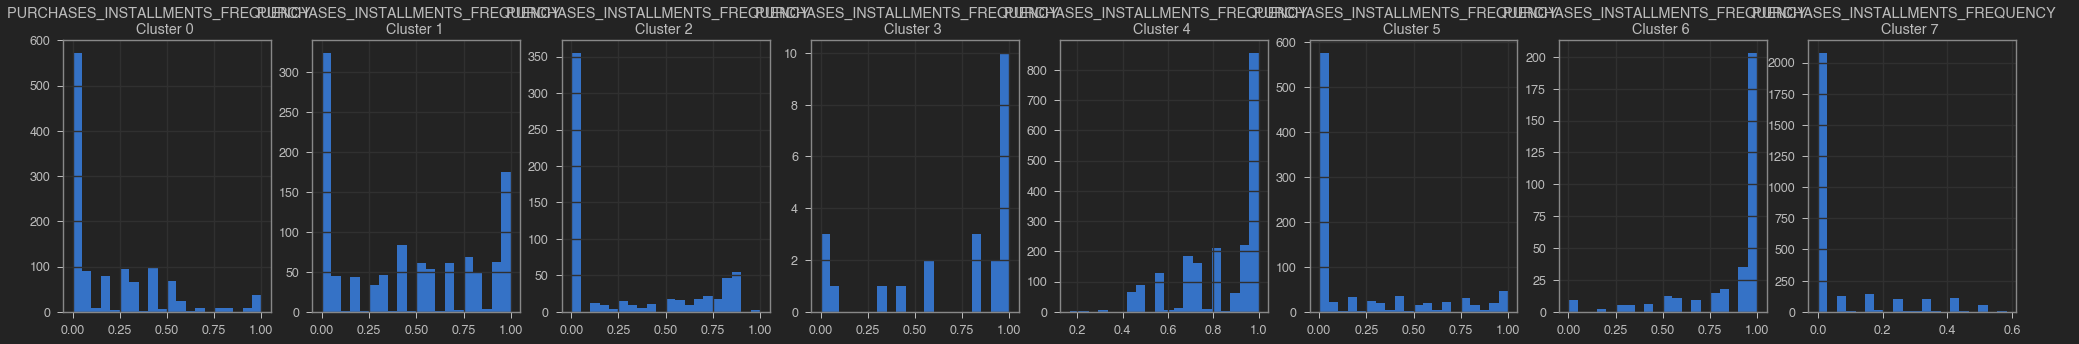

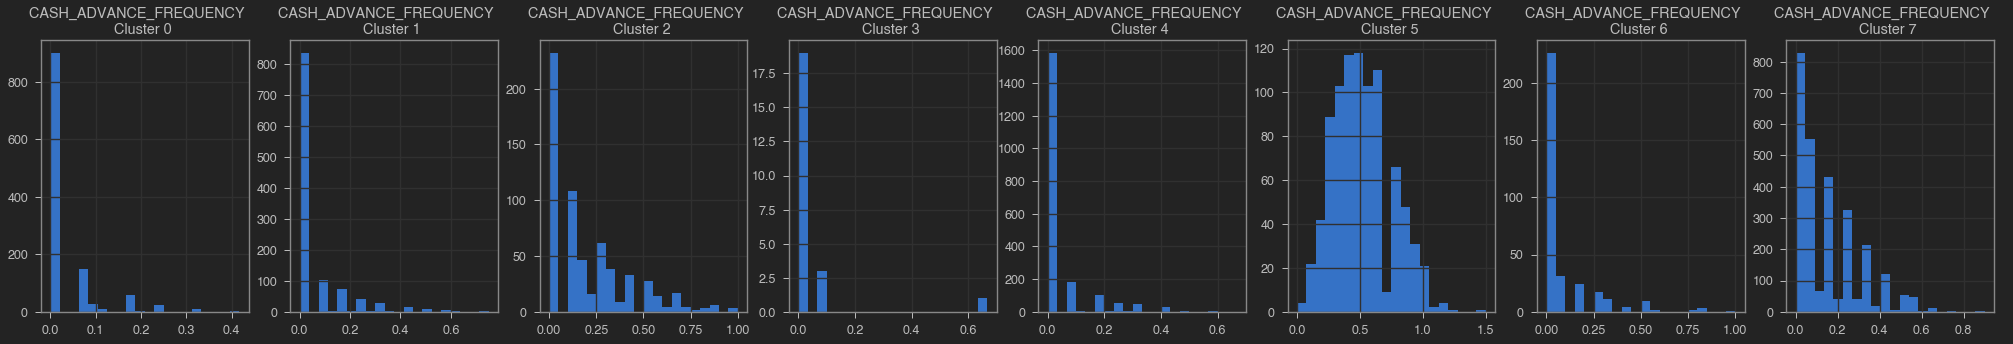

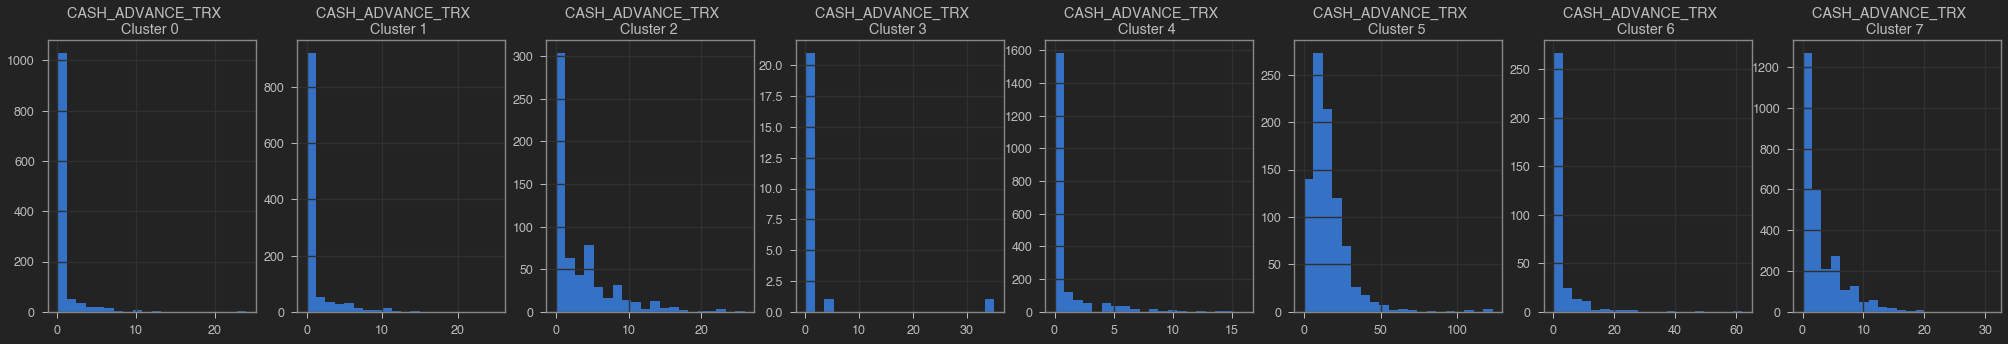

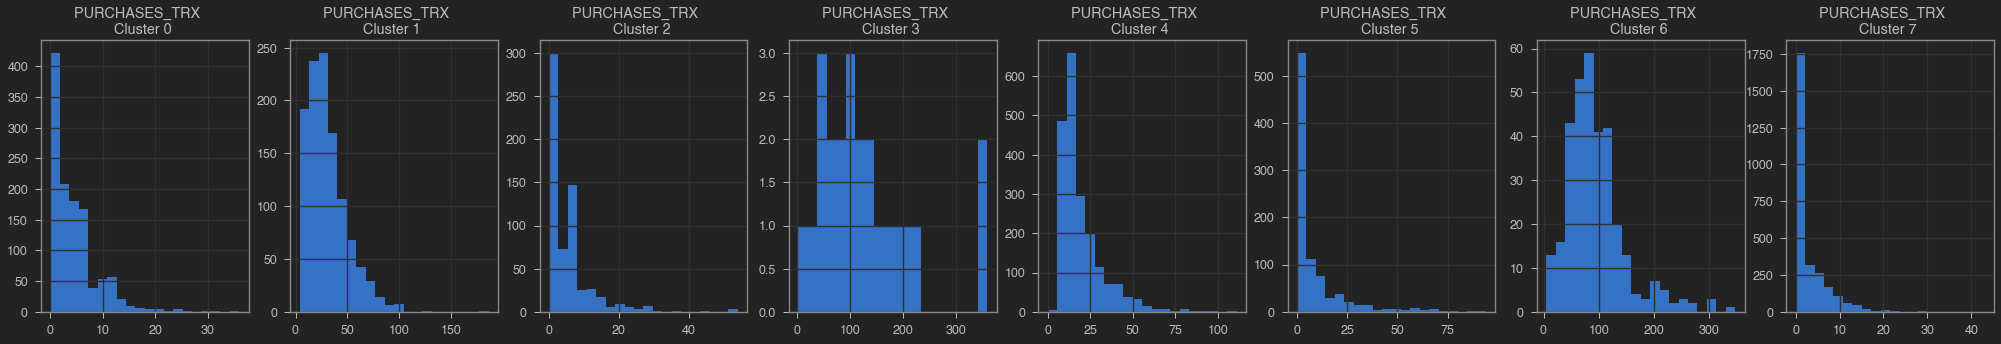

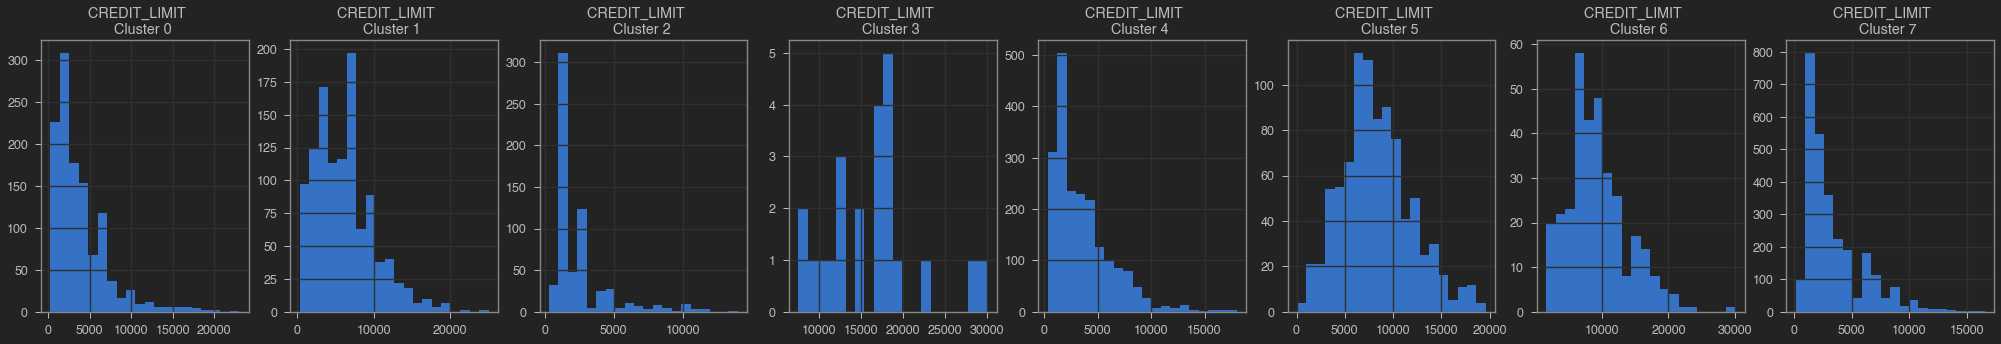

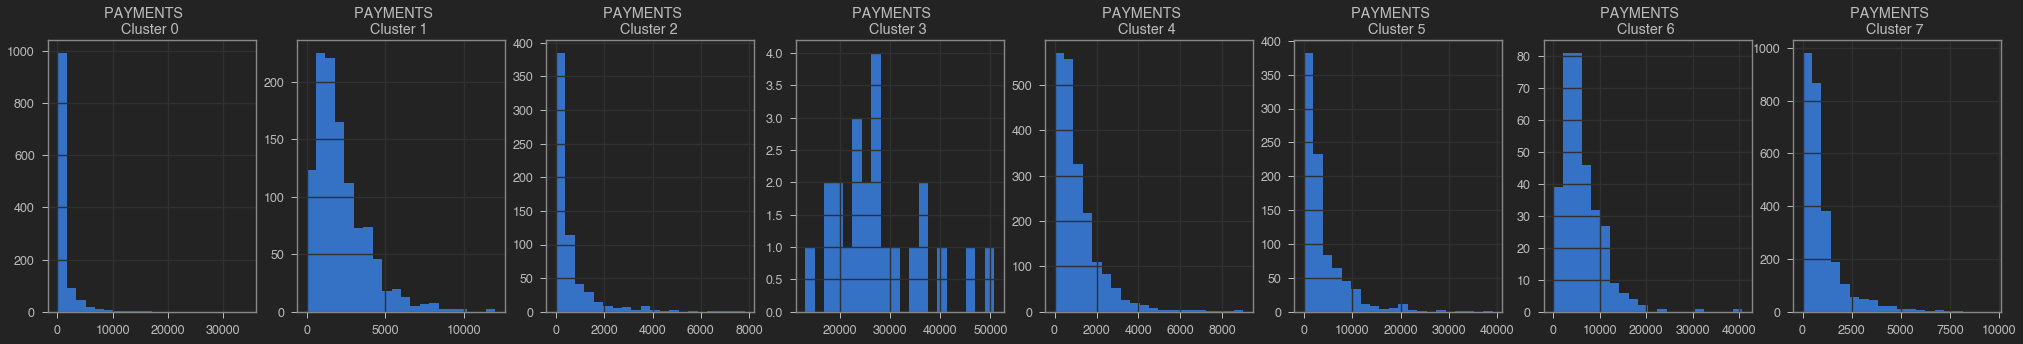

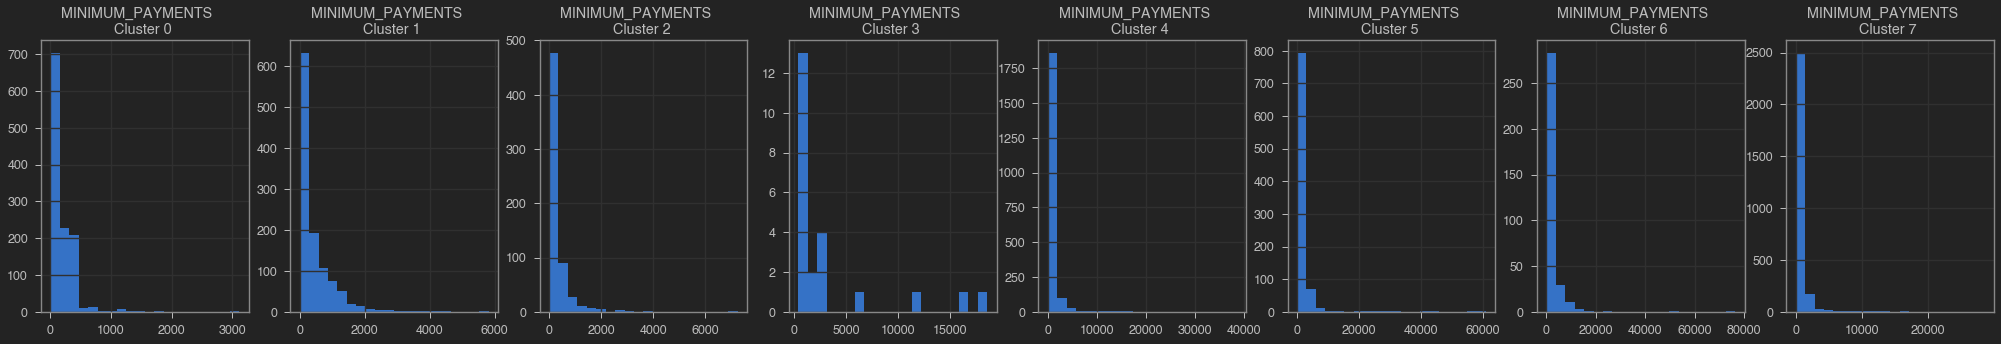

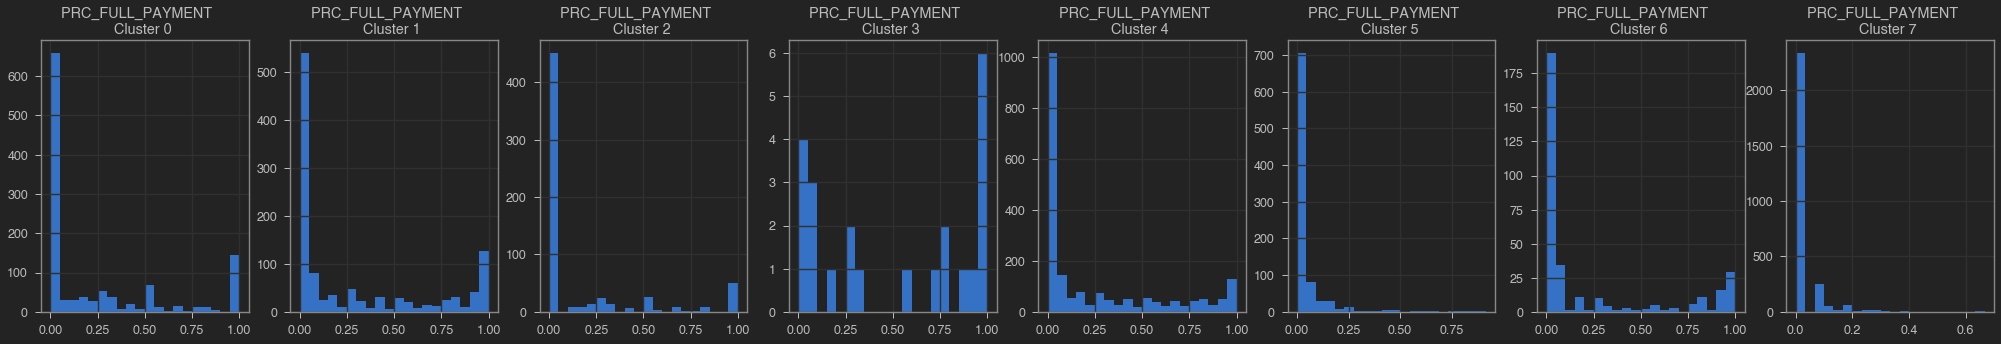

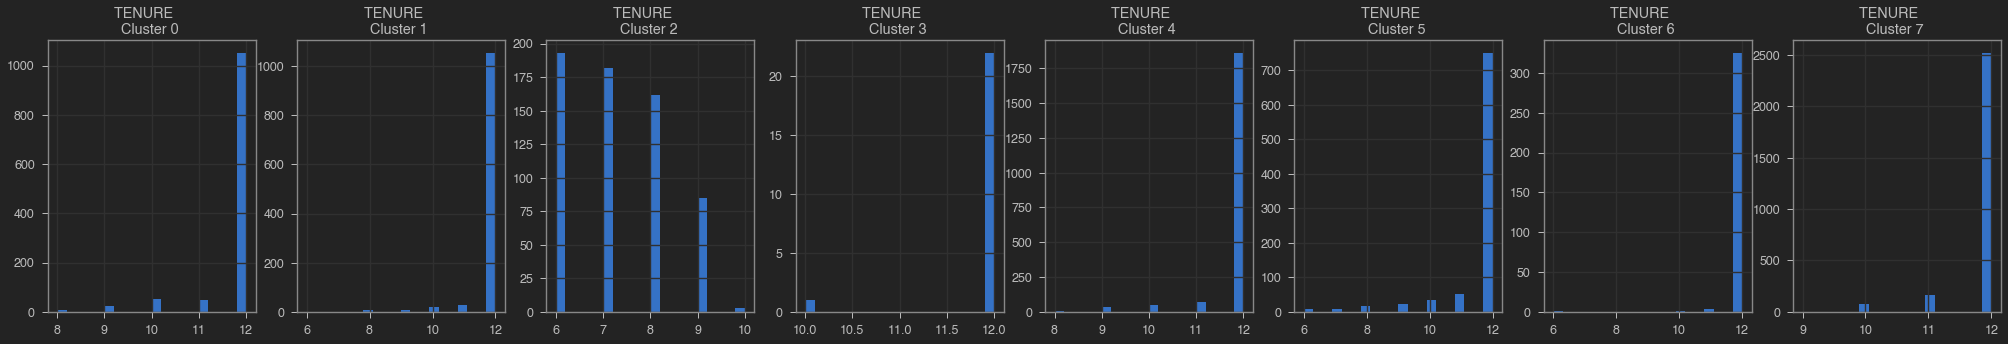

In [63]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
plt.show()

### What do the different clusters mean?

Cluster 0 - Transactors

Cluster 1 - Transactors

Cluster 2 - Low Tenure

Cluster 3 - VIP/Prime

Cluster 4 - Transactors

Cluster 5 - Revolvers

Cluster 6 - Transactors

Cluster 7 - Revolvers

### Dimensionality Reduction using PCA

To display the clusters on a 2-dimensional graph, we will have to reduce the number of dimensions or features from 17 to 2 using PCA or Principal Component Analysis. PCA will reduce dimensions while retaining the original information of all the 17 features.

In [64]:
# Obtaining the principal components 
pca = PCA(n_components = 2)
p_c = pca.fit_transform(creditcard_df_scaled)
p_c

array([[-1.68364804, -1.07224252],
       [-1.13407869,  2.50914599],
       [ 0.96939501, -0.38357328],
       ...,
       [-0.92898713, -1.8080482 ],
       [-2.33784761, -0.65361167],
       [-0.55802841, -0.40064388]])

In [65]:
# Creating a dataframe with the two components
pca_df = pd.DataFrame(data = p_c, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.683648,-1.072243
1,-1.134079,2.509146
2,0.969395,-0.383573
3,-0.888217,0.004646
4,-1.600022,-0.683795


In [66]:
# Concatenating the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683648,-1.072243,7
1,-1.134079,2.509146,5
2,0.969395,-0.383573,1
3,-0.888217,0.004646,7
4,-1.600022,-0.683795,7


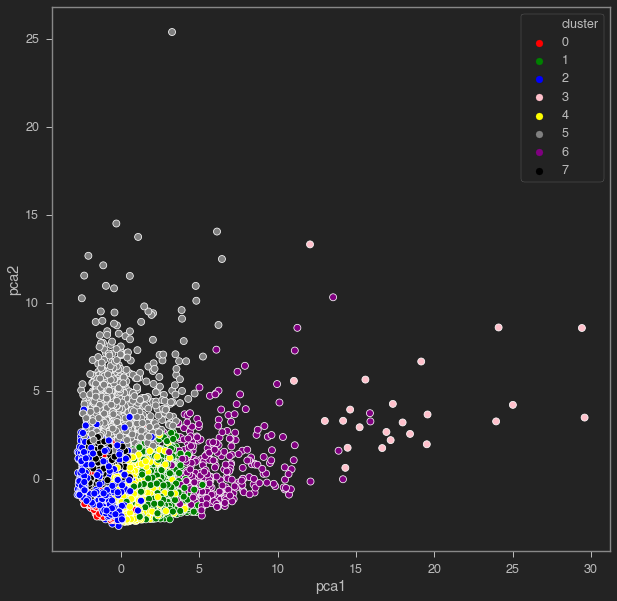

In [67]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()